In [22]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

import data_making as dm
%reload_ext autoreload
%autoreload 2

In [24]:
root = r"F:\RawReconstructions"
exp_names = ["osmoseflom_torrskan kjerne D 05b", "Angola_OC9_S19", "Berea04b", "TR_outcrop_sample", "Vuggy"]
phan_names = [f"phantom_{str(i).zfill(5)}" for i in range(1,12)]
o_root = r"F:\ReconstructionDatasets"
o_name = "experimental_data_factor12"

In [25]:
recs = [dm.EquinorReconstructions(root, name, o_root, o_name) for name in exp_names]
# recs = [dm.TomoBankPhantomCT(root,name,o_root, o_name, geo = dm.MicroGeometry() ) for name in phan_names]
# other_recs = [dm.TomoBankPhantomCT(root,name,o_root, o_name, geo = dm.MicroGeometry() ) for name in phan_names]

In [16]:
other_recs[0].process_data(other_recs,n_angles=12, undersampling_factor=True)

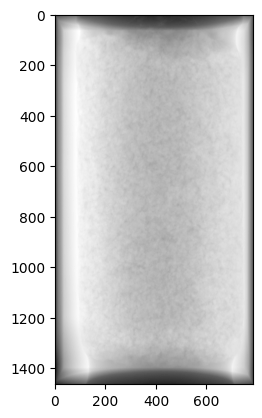

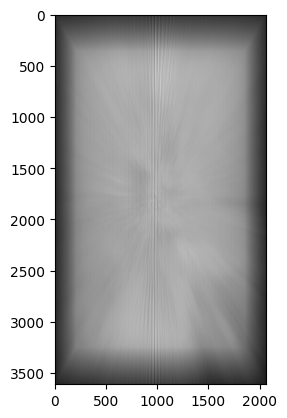

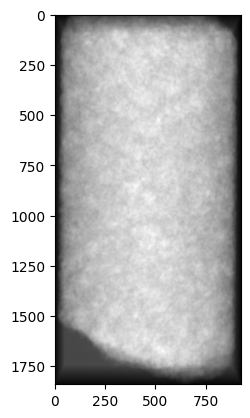

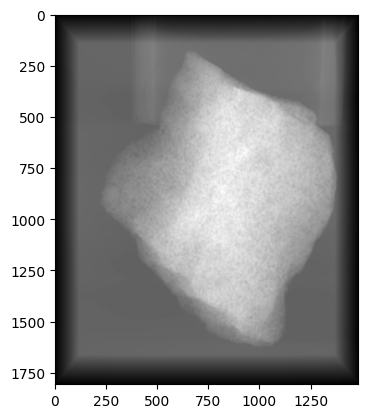

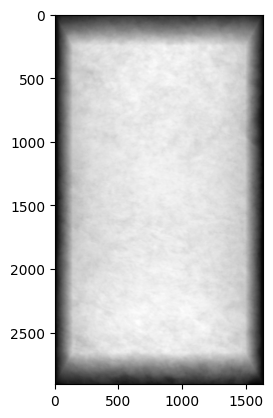

In [26]:
recs[0].process_data(recs, n_angles=12,undersampling_factor=True )

In [20]:
recs[0].copy_from_other(other_recs[0])

100%|██████████| 11/11 [01:17<00:00,  7.07s/it]


In [23]:
print(recs[0].__len__())

22


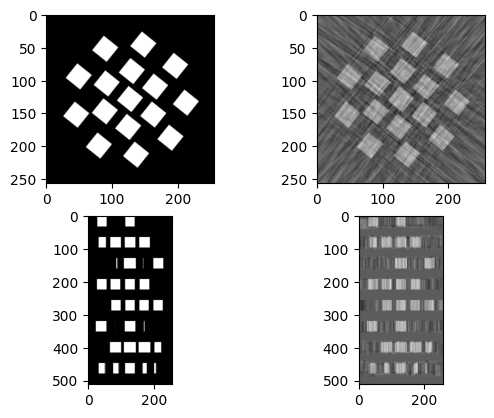

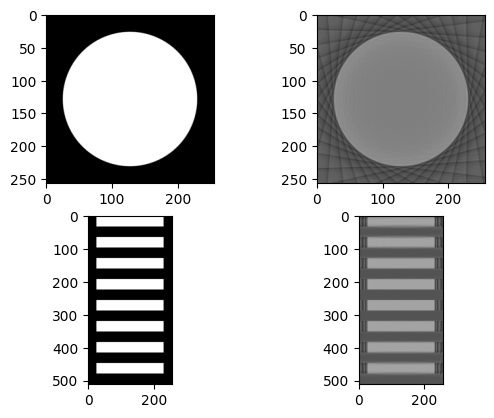

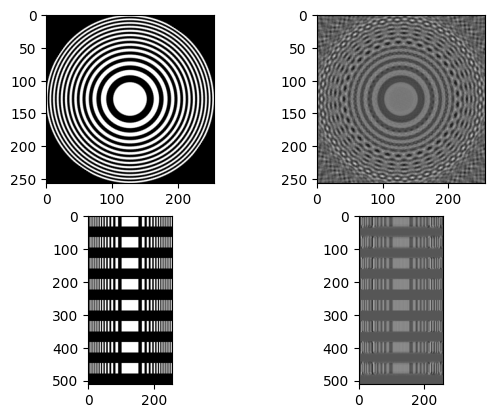

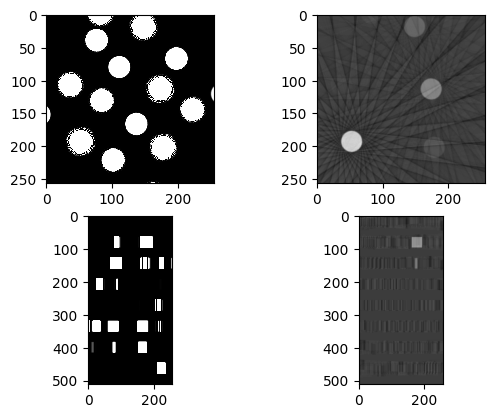

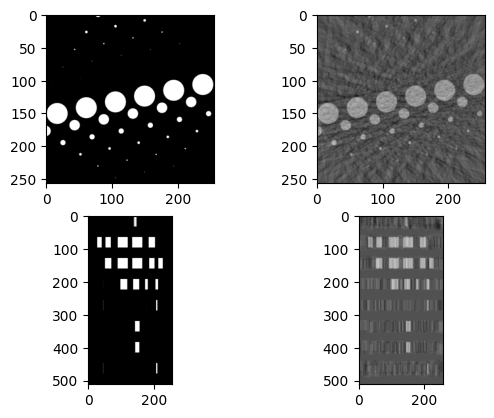

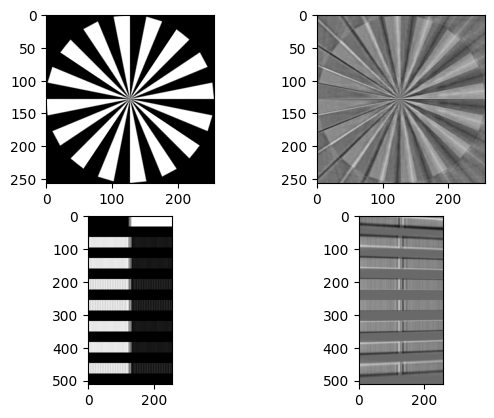

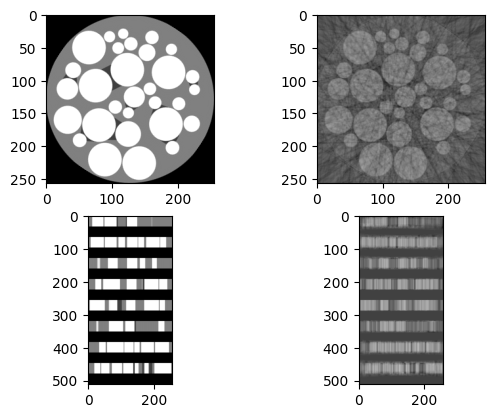

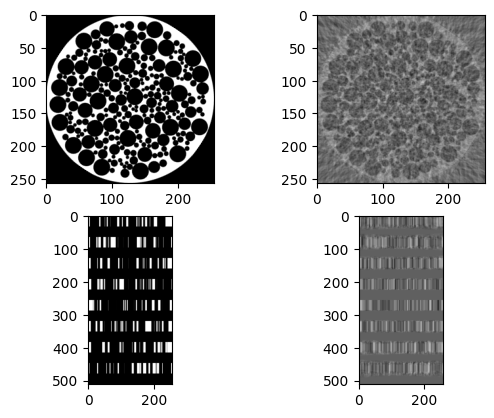

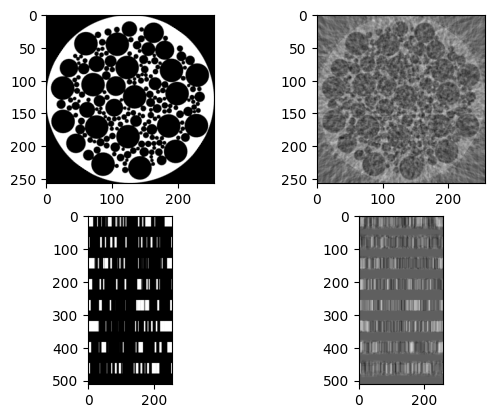

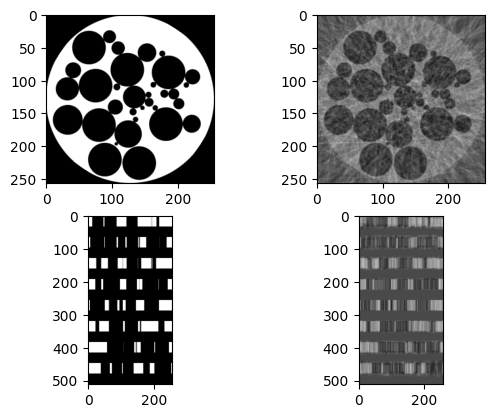

In [17]:
import h5py
import matplotlib.pyplot as plt

for i in range(10):

    with h5py.File(os.path.join(o_root, f"{o_name}.h5"), "r") as f:
        data_cross = np.array(f["target3D"][f"{str(i).zfill(5)}"][128,:,:])
        under_data_cross = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][128,:,:])

        data_proj = np.array(f["target3D"][f"{str(i).zfill(5)}"][:,128,:])
        under_data_proj = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][:,128,:])

    fig, ax = fig, ax = plt.subplots(2,2)
    ax= ax.reshape(-1)
    ax[0].imshow(data_cross, cmap="gray", vmin=0, vmax=1)
    ax[1].imshow(under_data_cross, cmap="gray", vmin=0, vmax=1)
    ax[2].imshow(data_proj, cmap="gray", vmin=0, vmax=1)
    ax[3].imshow(under_data_proj, cmap="gray", vmin=0, vmax=1)
    plt.show()

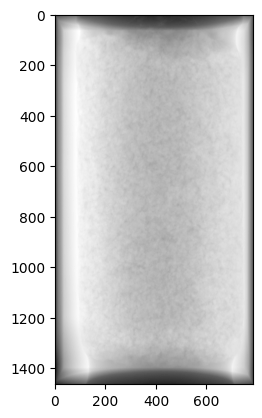

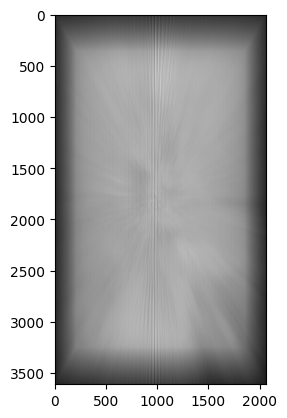

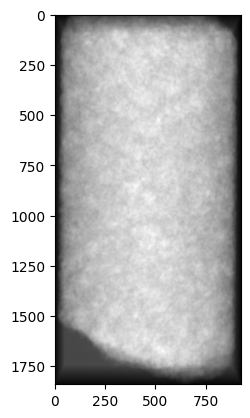

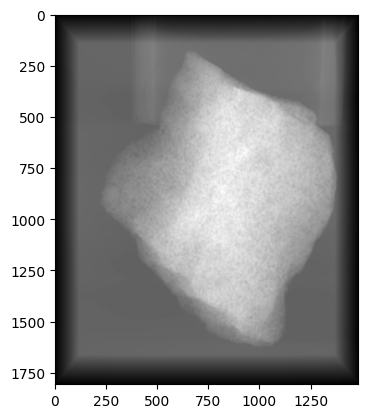

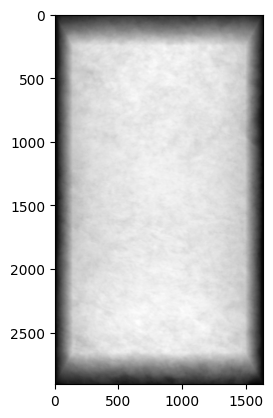

In [4]:
# recs[0].process_data(recs, n_angles=51)

experimental_data_factor16


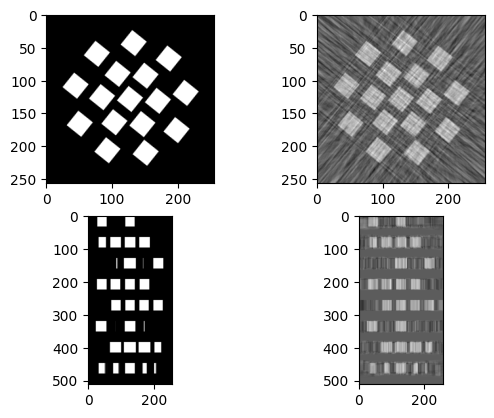

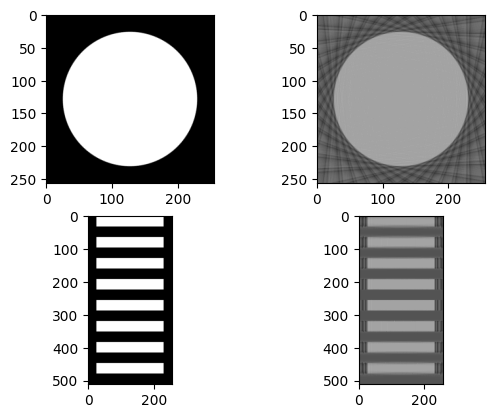

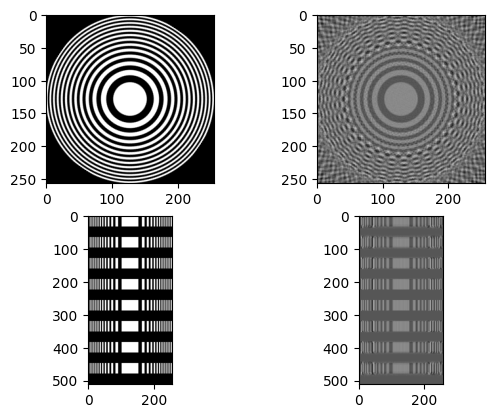

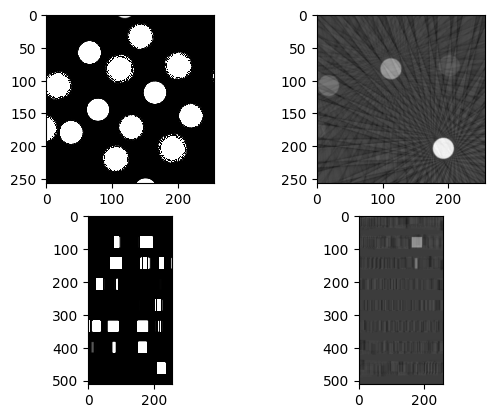

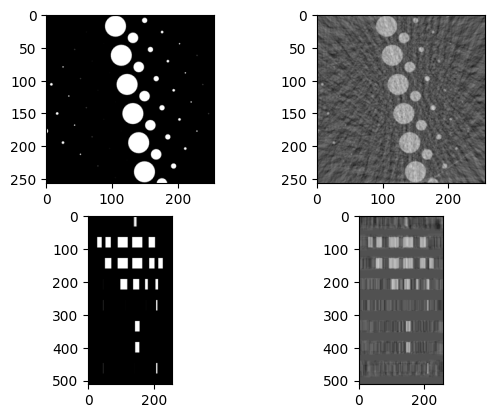

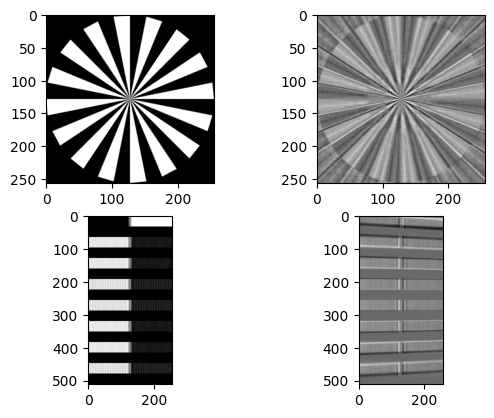

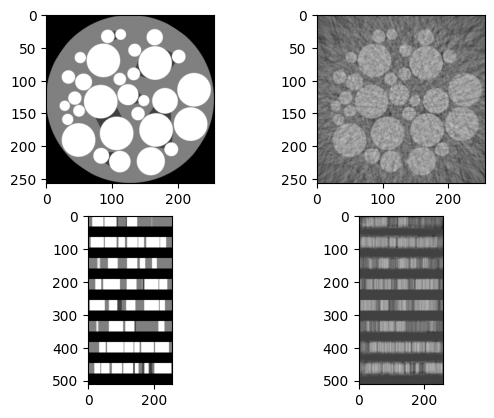

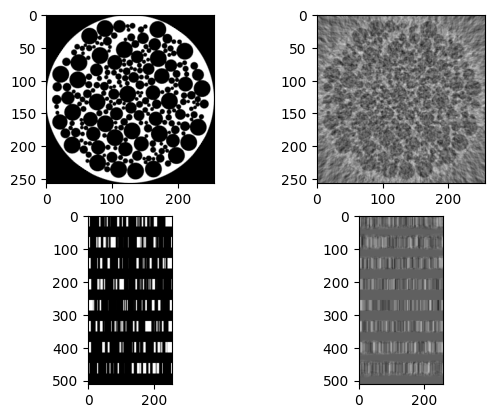

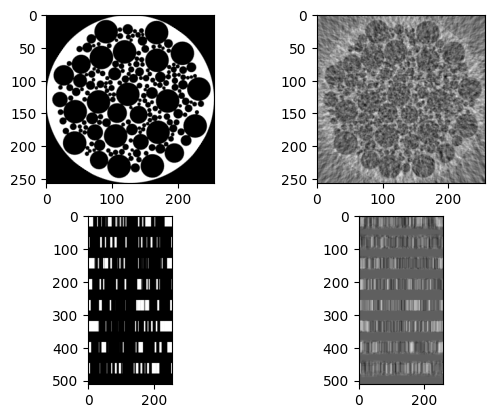

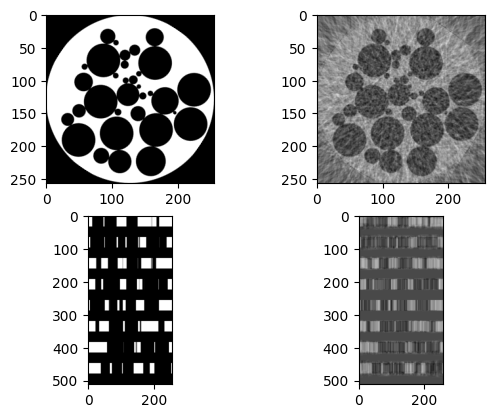

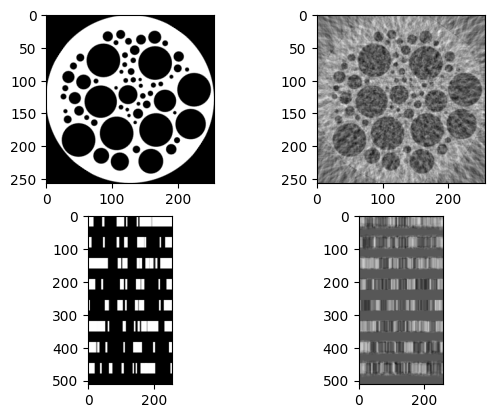

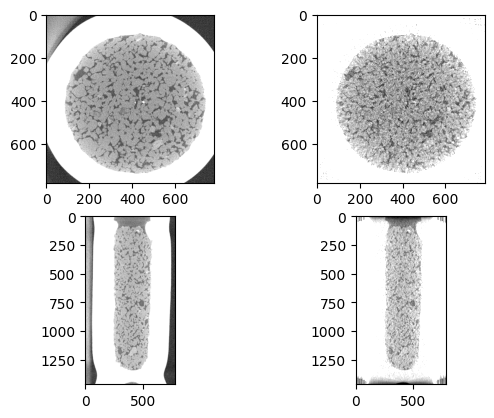

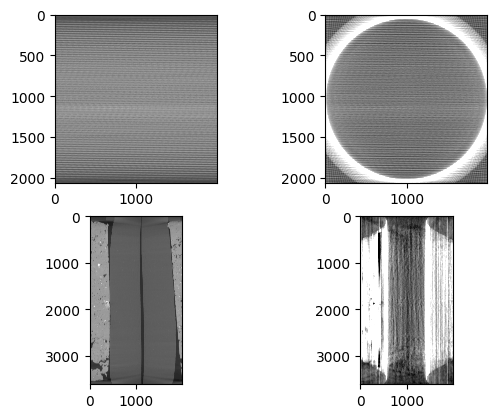

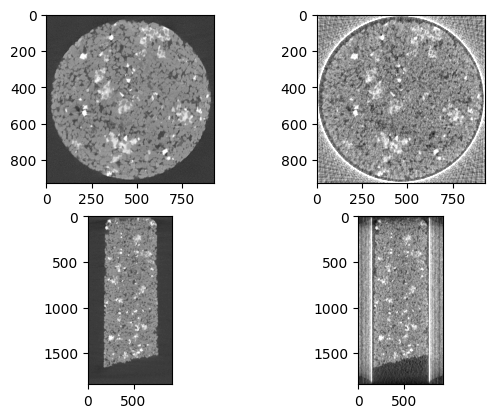

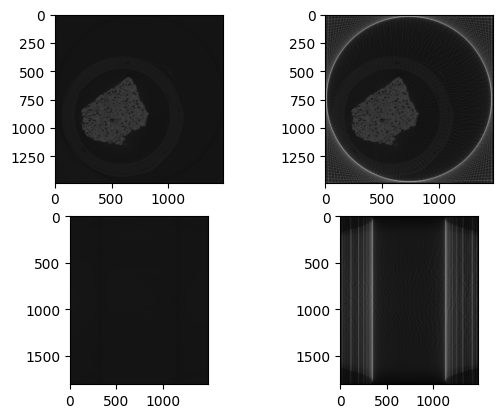

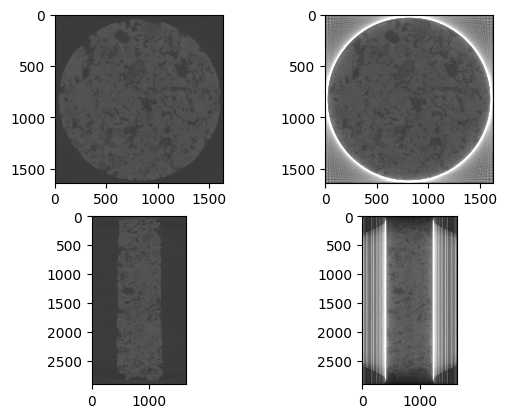

KeyError: "Unable to open object (object '00016' doesn't exist)"

In [16]:
import h5py
import matplotlib.pyplot as plt
print(o_name)

for i in range(30):

    with h5py.File(os.path.join(o_root, f"{o_name}.h5"), "r") as f:
        data_cross = np.array(f["target3D"][f"{str(i).zfill(5)}"][400,:,:])
        under_data_cross = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][400,:,:])

        data_proj = np.array(f["target3D"][f"{str(i).zfill(5)}"][:,128,:])
        under_data_proj = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][:,128,:])

    fig, ax = fig, ax = plt.subplots(2,2)
    ax= ax.reshape(-1)
    ax[0].imshow(data_cross, cmap="gray", vmin=0, vmax=1)
    ax[1].imshow(under_data_cross, cmap="gray", vmin=0, vmax=1)
    ax[2].imshow(data_proj, cmap="gray", vmin=0, vmax=1)
    ax[3].imshow(under_data_proj, cmap="gray", vmin=0, vmax=1)
    plt.show()

In [21]:
import h5py

with h5py.File(os.path.join(o_root, f"{o_name}.h5"), "r") as f:

    with h5py.File(os.path.join(o_root, f"experimental_data_factor16.h5"), "a") as o:
        o.create_group("target3D")
        o.create_group("noisy3D")
        from_i = np.arange(11,16)
        for idx, i in enumerate(from_i):
            o["target3D"].create_dataset(str(idx).zfill(5), data= f["target3D"][str(i).zfill(5)])
            o["noisy3D"].create_dataset(str(idx).zfill(5), data= f["noisy3D"][str(i).zfill(5)])



FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'F:\ReconstructionDatasets\experimental_data_factor16.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)